BD-Rate: -4.4252 %
BD-PSNR: 0.1194 dB


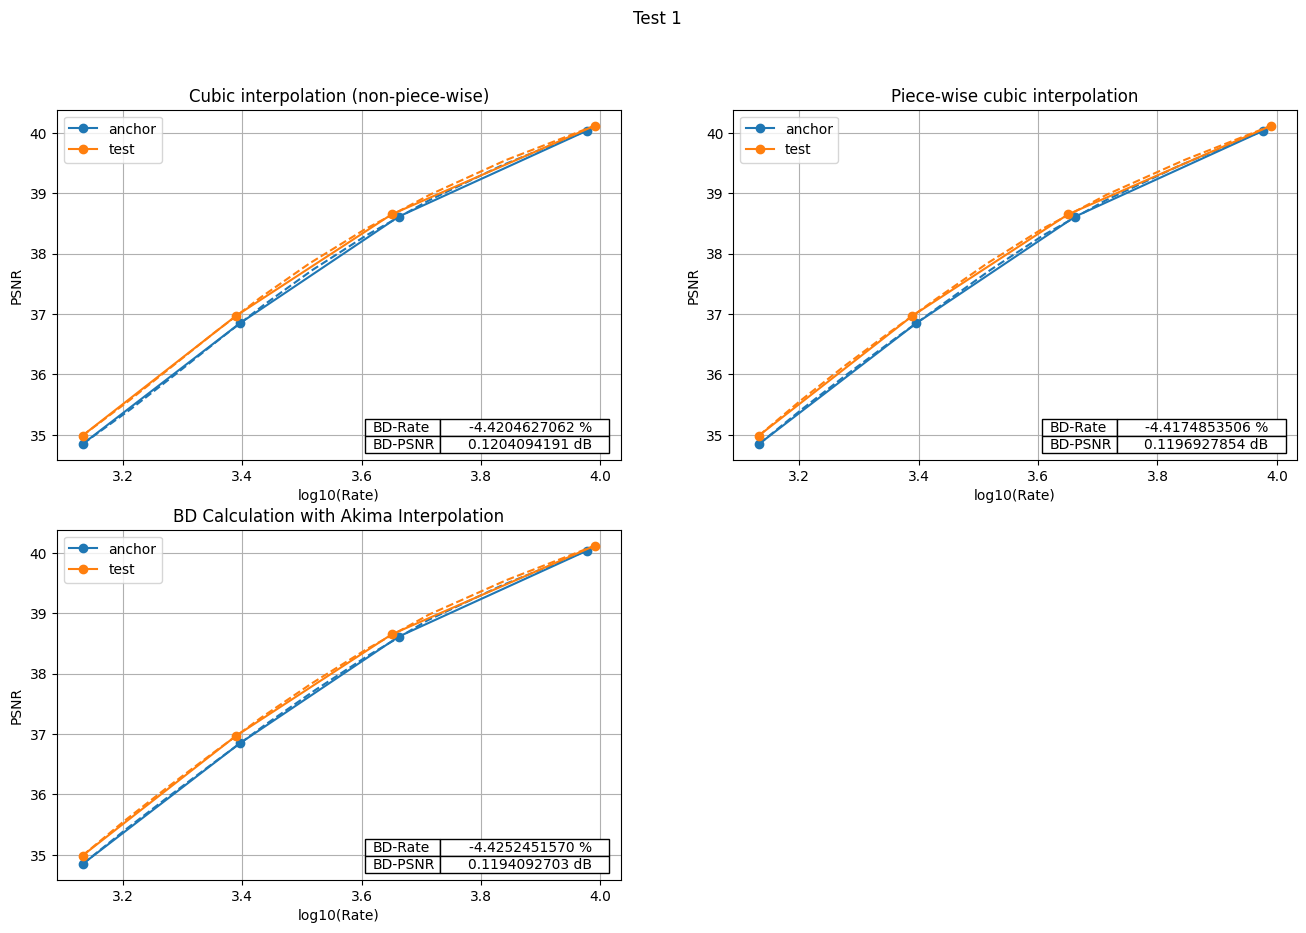

In [19]:
# Import the package
import bjontegaard as bd

# Test data
rate_anchor = [9487.76, 4593.60, 2486.44, 1358.24]
psnr_anchor = [ 40.037,  38.615,  36.845,  34.851]
rate_test = [9787.80, 4469.00, 2451.52, 1356.24]
psnr_test = [ 40.121,  38.651,  36.970,  34.987]

# Use the package
bd_rate = bd.bd_rate(rate_anchor, psnr_anchor, rate_test, psnr_test, method='akima')
bd_psnr = bd.bd_psnr(rate_anchor, psnr_anchor, rate_test, psnr_test, method='akima')

print(f"BD-Rate: {bd_rate:.4f} %")
print(f"BD-PSNR: {bd_psnr:.4f} dB")
bd.compare_methods(rate_anchor, psnr_anchor, rate_test, psnr_test, rate_label="Rate", distortion_label="PSNR", figure_label="Test 1", filepath=None)

In [11]:
import os
original_images = []
compressed_images_method = []
for dirname, _, filenames in os.walk('./input_image/'):
    for filename in filenames:
        original_images.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('./output_images/'):
    for filename in filenames:
        compressed_images_method.append(os.path.join(dirname, filename))

In [17]:
img1 = cv2.imread("./input_image/kodim01.png")
img2 = cv2.imread("./output_images/output_image_13.jpg")
calculate_psnr(img1,img2)

30.283673231689527

In [15]:
comp_img1.shape

(512, 768, 3)

In [13]:
import cv2
import numpy as np
import bjontegaard as bd
from skimage.metrics import structural_similarity as ssim

# Function to calculate PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate bit rate
def calculate_bit_rate(image_path):
    # Get the file size in bytes and convert to bits
    file_size_bytes = os.path.getsize(image_path)
    file_size_bits = file_size_bytes * 8  # Convert bytes to bits

    # Load the image to get its dimensions
    image = cv2.imread(image_path)
    num_pixels = image.shape[0] * image.shape[1]  # width x height

    # Calculate the bit rate (bits per pixel)
    bit_rate = file_size_bits / num_pixels

    return bit_rate

# Function to calculate MS-SSIM
def calculate_msssim(img1, img2):
    return ssim(img1, img2, multichannel=True, gaussian_weights=True, use_sample_covariance=False)

# Assuming you have lists of original and compressed image paths
compressed_images_method1 = compressed_images_method
compressed_images_method2 = compressed_images_method

# Lists to store PSNR and Bit Rates for both methods
psnr_method1 = []
psnr_method2 = []
bit_rates_method1 = []
bit_rates_method2 = []

for orig_path, comp_path1, comp_path2 in zip(original_images, compressed_images_method1, compressed_images_method2):
    orig_img = cv2.imread(orig_path)
    comp_img1 = cv2.imread(comp_path1)
    comp_img2 = cv2.imread(comp_path2)

    # Calculate PSNR
    psnr_method1.append(calculate_psnr(orig_img, comp_img1))
    psnr_method2.append(calculate_psnr(orig_img, comp_img2))

    # Calculate Bit Rates (assuming you have a function to calculate bit rates)
    bit_rates_method1.append(calculate_bit_rate(comp_path1))
    bit_rates_method2.append(calculate_bit_rate(comp_path2))

# Calculate the average PSNR and Bit Rate for each method
avg_psnr_method1 = sum(psnr_method1) / len(psnr_method1)
avg_psnr_method2 = sum(psnr_method2) / len(psnr_method2)
avg_bit_rate_method1 = sum(bit_rates_method1) / len(bit_rates_method1)
avg_bit_rate_method2 = sum(bit_rates_method2) / len(bit_rates_method2)

# Bjontegaard calculation
bd_rate = bd.bd_rate(bit_rates_method1, psnr_method1, bit_rates_method2, psnr_method2, method='akima')
bd_psnr = bd.bd_psnr(bit_rates_method1, psnr_method1, bit_rates_method2, psnr_method2, method='akima')

print(f"Average PSNR for Method 1: {avg_psnr_method1:.2f} dB")
print(f"Average PSNR for Method 2: {avg_psnr_method2:.2f} dB")
print(f"Average Bit Rate for Method 1: {avg_bit_rate_method1:.2f} bits/pixel")
print(f"Average Bit Rate for Method 2: {avg_bit_rate_method2:.2f} bits/pixel")
print(f"BD-Rate: {bd_rate:.4f} %")
print(f"BD-PSNR: {bd_psnr:.4f} dB")

ValueError: operands could not be broadcast together with shapes (768,512,3) (512,768,3) 